In [23]:
import os
os.getcwd()

'D:\\3. Projects\\RecylingNet\\Models\\YOLO Models'

In [24]:
# !git clone https://github.com/ultralytics/yolov5

In [25]:
# %cd yolov5

Once requirements is installed, it should work without install the requirements again

In [26]:
#pip install -r yolov5/requirements.txt

In [27]:
import torch

In [29]:
import pathlib
temp = pathlib.PosixPath
pathlib.PosixPath = pathlib.WindowsPath

In [30]:
# Set the path to your YOLOv5 model
model_path = 'C:/Users/alero/Documents/GitHub/Recycling-Collection-Service/Shinyapp/Local/models/YOLOv5/best.pt'
yolov5_dir = 'C:/Users/alero/Documents/GitHub/Recycling-Collection-Service/Shinyapp/yolov5'

# Load the model
model = torch.hub.load(yolov5_dir, 'custom', path=model_path, source='local', force_reload=True)

ImportError: cannot import name 'tarfile' from 'backports' (C:\Users\alero\anaconda3\Lib\site-packages\backports\__init__.py)

In [ ]:
img = "C:/Users/alero/Documents/GitHub/Recicling-Collection-Service/Shinyapp/Local/models/YOLOv5/IMG_7180.jpg"


# Inference
results = model(img)

# Results
results.show()


In [8]:
print(results)

image 1/1: 3024x4032 8 cans
Speed: 91.1ms pre-process, 178.8ms inference, 0.0ms NMS per image at shape (1, 3, 480, 640)


In [53]:
results_df = results.pandas().xyxy[0]
results_df

xmin        ymin         xmax         ymax  confidence  class name
0  1915.854248  751.190247  2412.818115  1785.293945    0.933689      0  can
1  1520.464844  738.962769  1950.573975  1751.643677    0.914819      0  can
2  2351.401367  793.119446  2909.859131  1873.154419    0.900879      0  can
3  1105.829590  735.380615  1577.839111  1744.263062    0.900842      0  can
4  3169.754639  839.739502  3869.730713  1884.194458    0.894027      0  can
5    55.974548  944.764832   844.920349  2067.733887    0.885428      0  can
6  2790.038086  803.020935  3385.772217  1862.077759    0.871088      0  can
7   638.291870  723.229065  1217.850952  1776.211792    0.867832      0  can

In [10]:
results_df = results.pandas().xywh[0]
results_df

xcenter      ycenter       width       height  confidence  class name
0  2164.336182  1268.242065  496.963867  1034.103760    0.933689      0  can
1  1735.519409  1245.303223  430.109131  1012.680908    0.914819      0  can
2  2630.630371  1333.136963  558.457764  1080.034912    0.900879      0  can
3  1341.834351  1239.821777  472.009521  1008.882446    0.900842      0  can
4  3519.742676  1361.967041  699.976074  1044.454956    0.894027      0  can
5   450.447449  1506.249390  788.945801  1122.968994    0.885428      0  can
6  3087.905273  1332.549316  595.734131  1059.056885    0.871088      0  can
7   928.071411  1249.720459  579.559082  1052.982666    0.867832      0  can

In [ ]:
results_df.values

In [18]:
results_df = results.pandas().xyxy[0]
results_df

xmin        ymin         xmax         ymax  confidence  class name
0  1915.854248  751.190247  2412.818115  1785.293945    0.933689      0  can
1  1520.464844  738.962769  1950.573975  1751.643677    0.914819      0  can
2  2351.401367  793.119446  2909.859131  1873.154419    0.900879      0  can
3  1105.829590  735.380615  1577.839111  1744.263062    0.900842      0  can
4  3169.754639  839.739502  3869.730713  1884.194458    0.894027      0  can
5    55.974548  944.764832   844.920349  2067.733887    0.885428      0  can
6  2790.038086  803.020935  3385.772217  1862.077759    0.871088      0  can
7   638.291870  723.229065  1217.850952  1776.211792    0.867832      0  can

In [17]:
for i in results_df.values:
    print(i[0])

2164.336181640625
1735.5194091796875
2630.63037109375
1341.8343505859375
3519.74267578125
450.44744873046875
3087.9052734375
928.0714111328125


In [20]:
for _, pred in results.pandas().xyxy[0].iterrows():
    x0, y0, x1, y1 = int(pred['xmin']), int(pred['ymin']), int(pred['xmax']), int(pred['ymax'])
    label = pred['name']
    print(x0, y0, x1, y1)

1915 751 2412 1785
1520 738 1950 1751
2351 793 2909 1873
1105 735 1577 1744
3169 839 3869 1884
55 944 844 2067
2790 803 3385 1862
638 723 1217 1776


In [42]:
sum(results_df.name == 'can')

8

In [43]:
sum(results_df.name == 'glass bottle')

3

In [44]:
sum(results_df.name == 'plastic bottle')

0

In [45]:
l_classes = results_df['name'].tolist()
l_classes

['can',
 'can',
 'can',
 'can',
 'can',
 'can',
 'can',
 'can',
 'glass bottle',
 'glass bottle',
 'glass bottle']

In [15]:
# from ultralytics import YOLO

# # Load model
# model = YOLO('C:/Users/alero/Documents/GitHub/Recicling-Collection-Service/Shinyapp/Local/models/YOLOv5/best.pt')

# # Run inference on an image
# results = model('C:/Users/alero/Documents/GitHub/Recicling-Collection-Service/Shinyapp/Local/models/YOLOv5/IMG_6011.jpg')  # list of 1 Results object

# Video

In [48]:
video = "Desktop/IMG_0254.MOV"

In [54]:
!python yolov5/detect.py --weights model_path --img 640 --conf 0.1 --source video

detect: weights=['model_path'], source=video, data=yolov5\data\coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5\runs\detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5  v7.0-362-ge8a30cf8 Python-3.9.19 torch-2.0.1+cpu CPU

Traceback (most recent call last):
  File "C:\Users\alero\Documents\GitHub\Recicling-Collection-Service\Shinyapp\yolov5\detect.py", line 437, in <module>
    main(opt)
  File "C:\Users\alero\Documents\GitHub\Recicling-Collection-Service\Shinyapp\yolov5\detect.py", line 432, in main
    run(**vars(opt))
  File "C:\Users\alero\.conda\envs\ML\lib\site-packages\torch\utils\_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
 

# YOLOv11

In [1]:
cd

C:\Users\alero


In [2]:
import os
print(os.getcwd())

C:\Users\alero


In [3]:
os.chdir('D:/3. Projects/RecylingNet/Models/YOLO Models')

In [4]:
print(os.getcwd())

D:\3. Projects\RecylingNet\Models\YOLO Models


In [5]:
ls

 Volume in drive D is Data
 Volume Serial Number is D0A4-3D5E

 Directory of D:\3. Projects\RecylingNet\Models\YOLO Models

10/05/2024  09:20 AM    <DIR>          .
08/11/2024  08:11 PM    <DIR>          ..
10/05/2024  09:20 AM    <DIR>          runs
10/05/2024  09:17 AM    <DIR>          YOLOv11s
07/30/2024  07:25 PM    <DIR>          YOLOv5s
               0 File(s)              0 bytes
               5 Dir(s)  392,381,825,024 bytes free


In [6]:
img_path = 'D:/3. Projects/RecylingNet/Data/Testing database/Testing pictures/Hotel pictures/Mix/glass2.png'


YOLO_model_path = './YOLOv11s/200 epochs/best.pt'

In [7]:
from ultralytics import YOLO

model = YOLO(YOLO_model_path)

## Object detection

In [8]:
results = model(img_path, save=True, conf=0.25)


image 1/1 D:\3. Projects\RecylingNet\Data\Testing database\Testing pictures\Hotel pictures\Mix\glass2.png: 640x512 11 glass bottles, 242.9ms
Speed: 0.0ms preprocess, 242.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 512)
Results saved to runs\detect\predict5


In [9]:
from IPython.display import Image as IPyImage, display

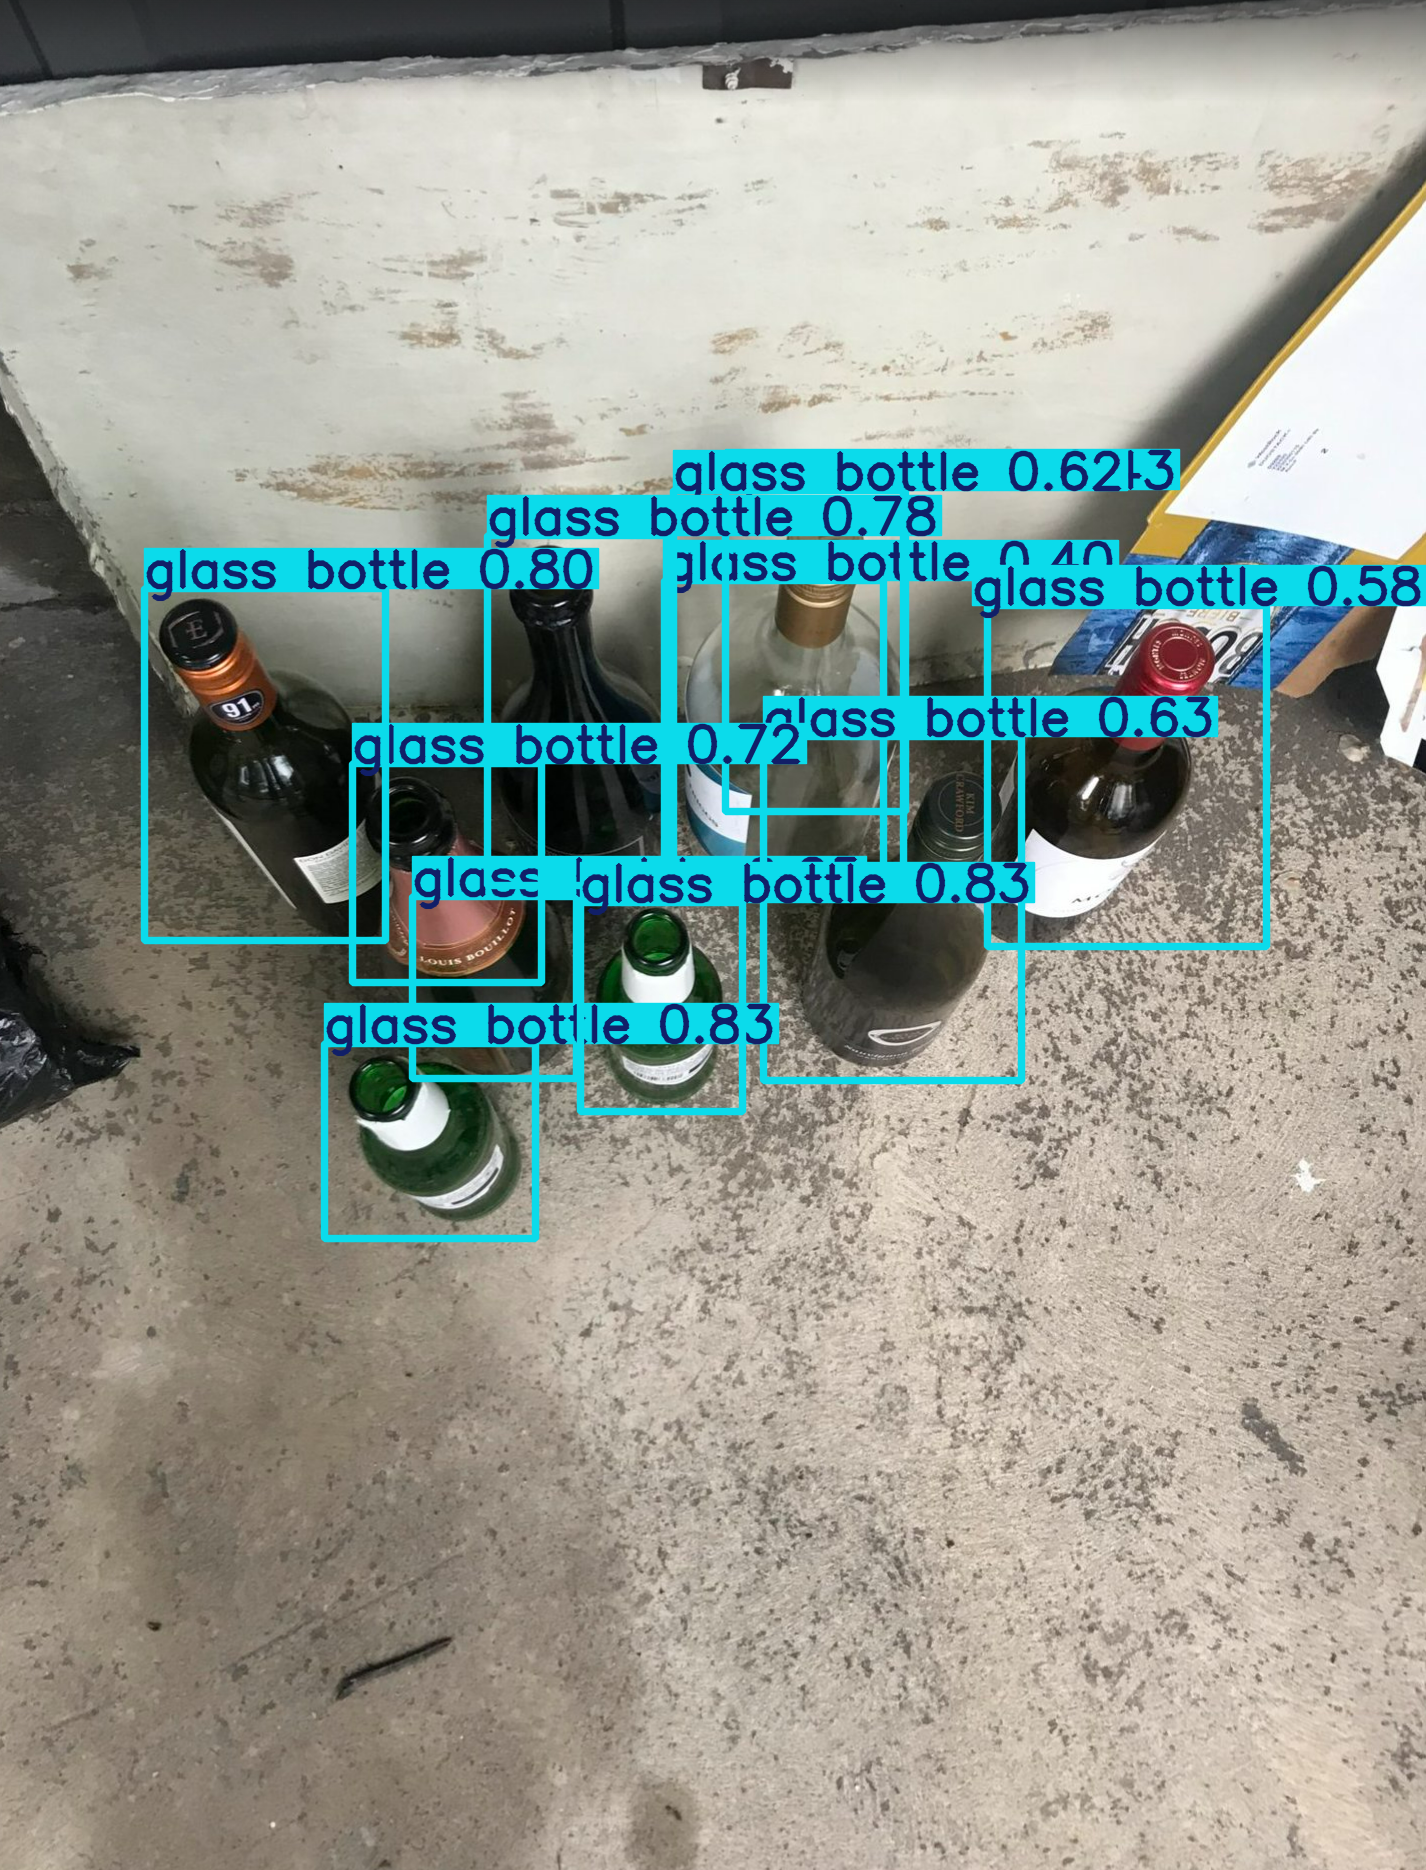

In [10]:
IPyImage(filename='./runs/detect/predict5/glass2.png', width=800)

In [13]:
# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])
conf: tensor([0.8333, 0.8330, 0.7981, 0.7799, 0.7176, 0.6302, 0.6234, 0.5768, 0.4302, 0.4034, 0.2501])
data: tensor([[5.8090e+02, 9.0230e+02, 7.4266e+02, 1.1117e+03, 8.3327e-01, 1.0000e+00],
        [3.2409e+02, 1.0431e+03, 5.3595e+02, 1.2382e+03, 8.3299e-01, 1.0000e+00],
        [1.4432e+02, 5.8831e+02, 3.8548e+02, 9.4054e+02, 7.9805e-01, 1.0000e+00],
        [4.8796e+02, 5.3546e+02, 6.6697e+02, 8.8502e+02, 7.7989e-01, 1.0000e+00],
        [3.5297e+02, 7.6378e+02, 5.4120e+02, 9.8219e+02, 7.1756e-01, 1.0000e+00],
        [7.6317e+02, 7.3606e+02, 1.0213e+03, 1.0804e+03, 6.3021e-01, 1.0000e+00],
        [6.7359e+02, 4.9008e+02, 9.0301e+02, 8.8719e+02, 6.2344e-01, 1.0000e+00],
        [9.8730e+02, 6.0535e+02, 1.2664e+03, 9.4671e+02, 5.7680e-01, 1.0000e+00],
        [7.2549e+02, 4.8944e+02, 9.0501e+02, 8.1176e+02, 4.3017e-01, 1.0000e+00],
        [6.6437e+02, 5.8097e+02, 8.83

In [14]:
# View results
for r in results:
    print(r.probs)  # print the Probs object containing the detected class probabilities

None


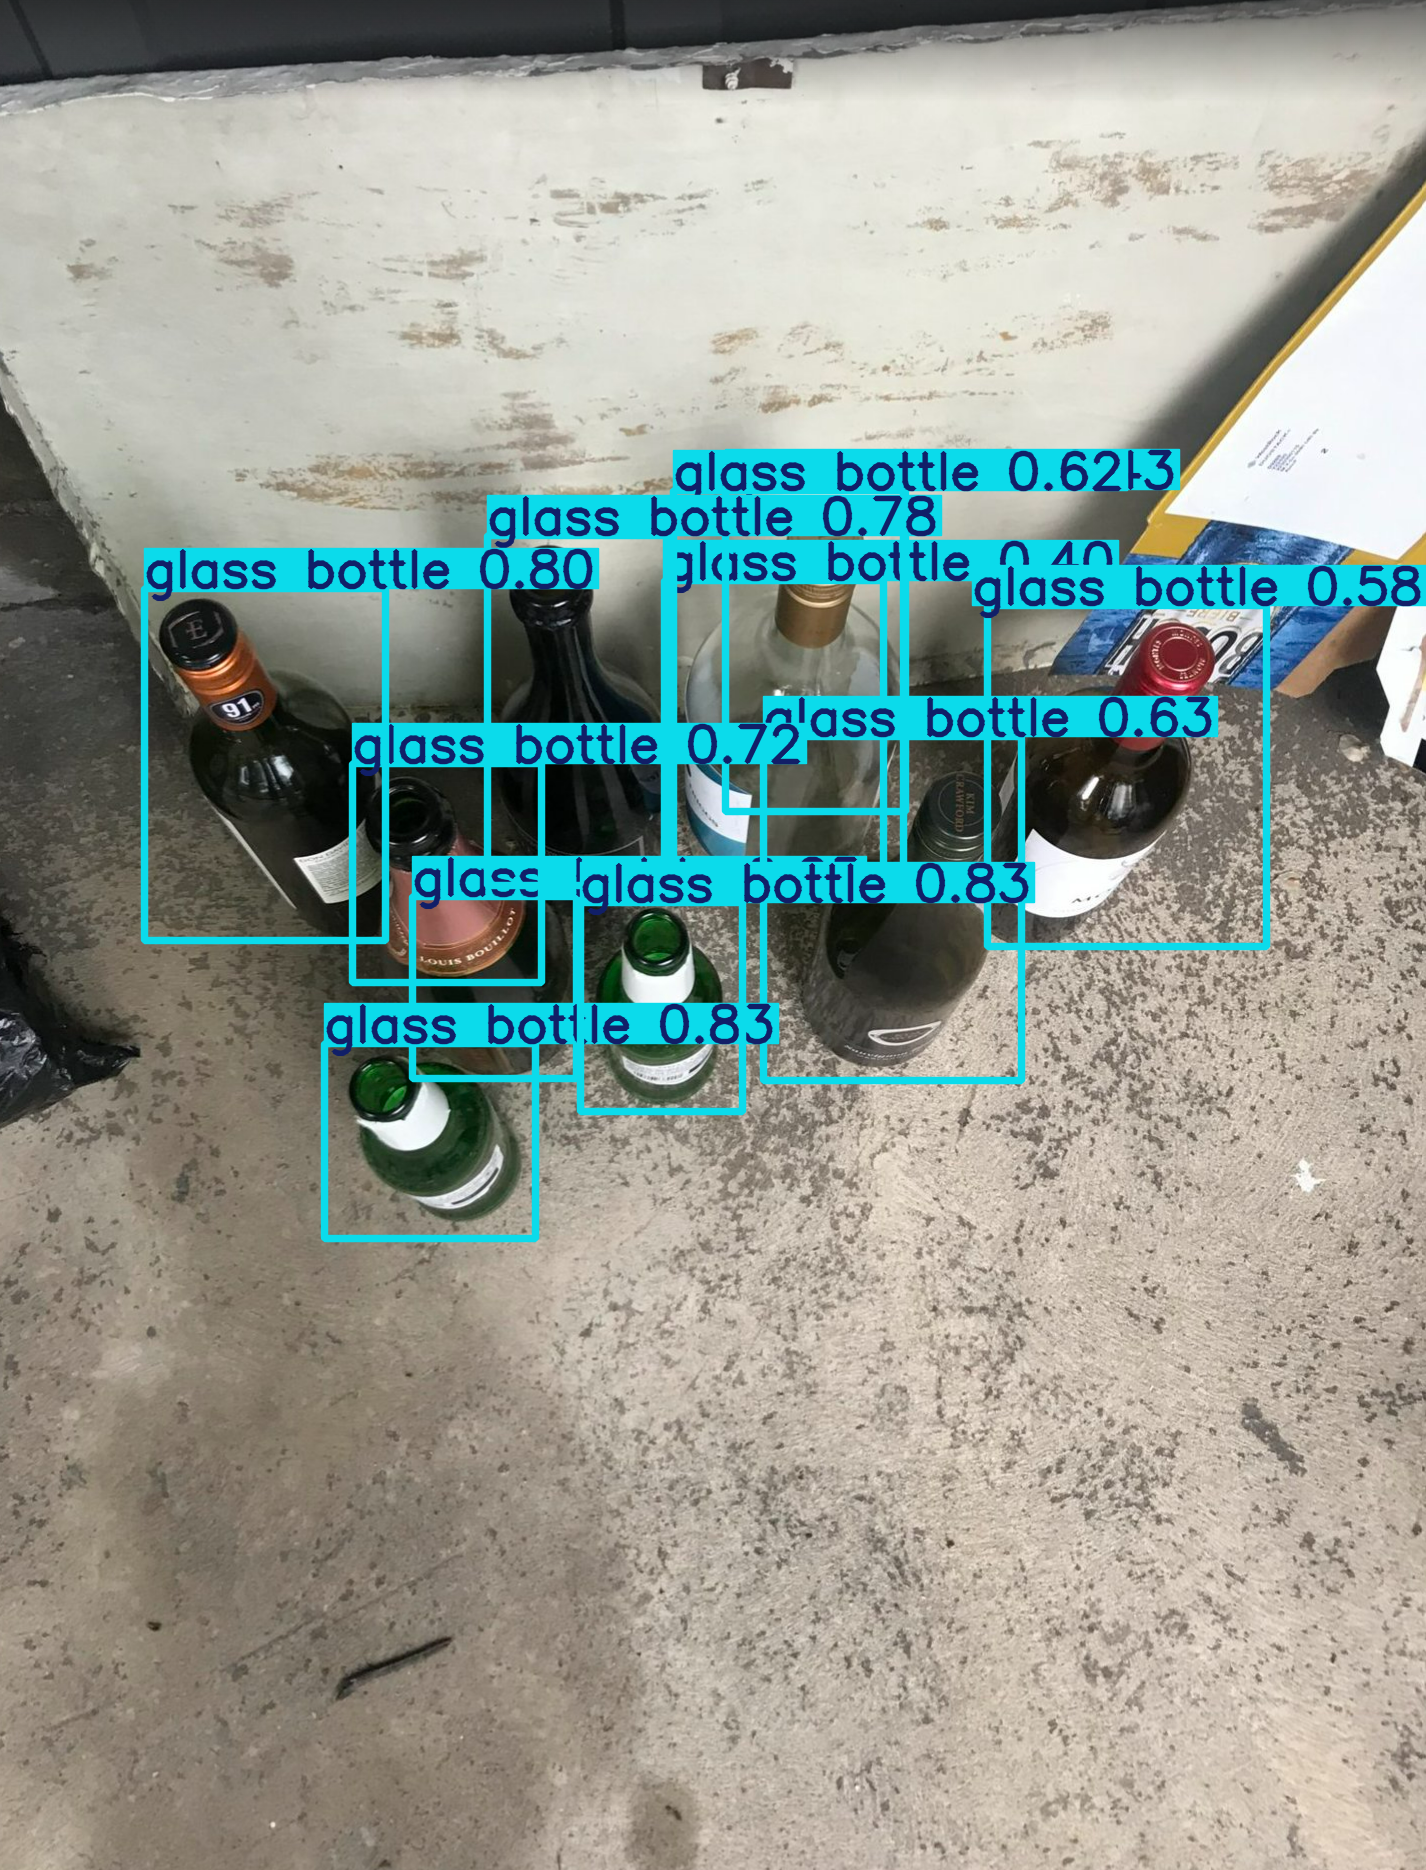

In [16]:
from PIL import Image

from ultralytics import YOLO

# Visualize the results
for i, r in enumerate(results):
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

# Streaming Source for-loop

In [18]:
import cv2

from ultralytics import YOLO


# Open the video file
video_path = 'D:/3. Projects/RecylingNet/Data/Testing database/App database/DCIM 18-7-2024/videos/IMG_9259.MOV'
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame
        results = model(frame, conf=0.5)

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()


0: 640x384 (no detections), 107.7ms
Speed: 3.0ms preprocess, 107.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 124.8ms
Speed: 4.0ms preprocess, 124.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 110.3ms
Speed: 2.0ms preprocess, 110.3ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 103.9ms
Speed: 0.8ms preprocess, 103.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 115.9ms
Speed: 0.0ms preprocess, 115.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 117.3ms
Speed: 0.0ms preprocess, 117.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 101.8ms
Speed: 2.5ms preprocess, 101.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 103.1ms
Speed: 0.7ms prepr


0: 640x384 7 cans, 1 plastic bottle, 310.2ms
Speed: 20.5ms preprocess, 310.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 cans, 1 plastic bottle, 372.3ms
Speed: 6.1ms preprocess, 372.3ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 cans, 1 plastic bottle, 470.7ms
Speed: 7.3ms preprocess, 470.7ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 cans, 1 plastic bottle, 1524.0ms
Speed: 13.6ms preprocess, 1524.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 cans, 1 plastic bottle, 1754.3ms
Speed: 0.0ms preprocess, 1754.3ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 6 cans, 1 plastic bottle, 2334.6ms
Speed: 31.0ms preprocess, 2334.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 7 cans, 1 plastic bottle, 1588.5ms
Speed: 14.9ms preprocess, 1588.5ms inference, 0.0ms postprocess per image at sha


0: 640x384 13 cans, 1 plastic bottle, 180.3ms
Speed: 2.6ms preprocess, 180.3ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 185.2ms
Speed: 15.0ms preprocess, 185.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 13 cans, 1 plastic bottle, 188.1ms
Speed: 3.0ms preprocess, 188.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 162.6ms
Speed: 4.0ms preprocess, 162.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 199.9ms
Speed: 4.0ms preprocess, 199.9ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 161.6ms
Speed: 3.0ms preprocess, 161.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 194.2ms
Speed: 6.0ms preprocess, 194.2ms inference, 0.0ms postprocess per image at shape (

Speed: 3.0ms preprocess, 157.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic bottle, 148.5ms
Speed: 13.0ms preprocess, 148.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 21 cans, 1 plastic bottle, 138.5ms
Speed: 3.0ms preprocess, 138.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic bottle, 129.7ms
Speed: 3.0ms preprocess, 129.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic bottle, 148.1ms
Speed: 3.0ms preprocess, 148.1ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic bottle, 150.5ms
Speed: 0.0ms preprocess, 150.5ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic bottle, 143.1ms
Speed: 3.0ms preprocess, 143.1ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 22 cans, 1 plastic 


0: 640x384 28 cans, 1 plastic bottle, 121.5ms
Speed: 8.0ms preprocess, 121.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 29 cans, 129.9ms
Speed: 3.0ms preprocess, 129.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 27 cans, 2 plastic bottles, 130.8ms
Speed: 2.0ms preprocess, 130.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 28 cans, 2 plastic bottles, 124.7ms
Speed: 4.0ms preprocess, 124.7ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 29 cans, 124.1ms
Speed: 3.0ms preprocess, 124.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 27 cans, 1 plastic bottle, 130.3ms
Speed: 14.3ms preprocess, 130.3ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 29 cans, 1 plastic bottle, 131.7ms
Speed: 4.0ms preprocess, 131.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 28 can


0: 640x384 16 cans, 1 plastic bottle, 128.8ms
Speed: 2.0ms preprocess, 128.8ms inference, 11.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 16 cans, 1 plastic bottle, 129.5ms
Speed: 13.7ms preprocess, 129.5ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 115.2ms
Speed: 14.1ms preprocess, 115.2ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 15 cans, 1 plastic bottle, 145.9ms
Speed: 0.0ms preprocess, 145.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 3 plastic bottles, 126.8ms
Speed: 3.0ms preprocess, 126.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 14 cans, 1 plastic bottle, 145.6ms
Speed: 0.0ms preprocess, 145.6ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 15 cans, 1 plastic bottle, 144.3ms
Speed: 12.6ms preprocess, 144.3ms inference, 1.0ms postprocess per image at sha


0: 640x384 8 cans, 146.7ms
Speed: 12.4ms preprocess, 146.7ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 cans, 187.7ms
Speed: 0.0ms preprocess, 187.7ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 8 cans, 166.9ms
Speed: 0.0ms preprocess, 166.9ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 cans, 166.8ms
Speed: 0.0ms preprocess, 166.8ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 cans, 181.1ms
Speed: 0.0ms preprocess, 181.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 cans, 172.0ms
Speed: 3.0ms preprocess, 172.0ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 9 cans, 177.0ms
Speed: 8.0ms preprocess, 177.0ms inference, 0.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 8 cans, 183.7ms
Speed: 0.0ms preprocess, 183.7ms inference, 0.0ms postprocess per image at shape (1, 3, 6

## Object tracking 

In [ ]:
file_path = 'D:/3. Projects/RecylingNet/Data/Testing database/Testing pictures/Hotel pictures/Mix/glass2.png'
results = model.track(file_path, save=True, show=True)